<a href="https://colab.research.google.com/github/CuadraAlconero/IDAL_IA3_CuadraAlconero/blob/main/Hunger_games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

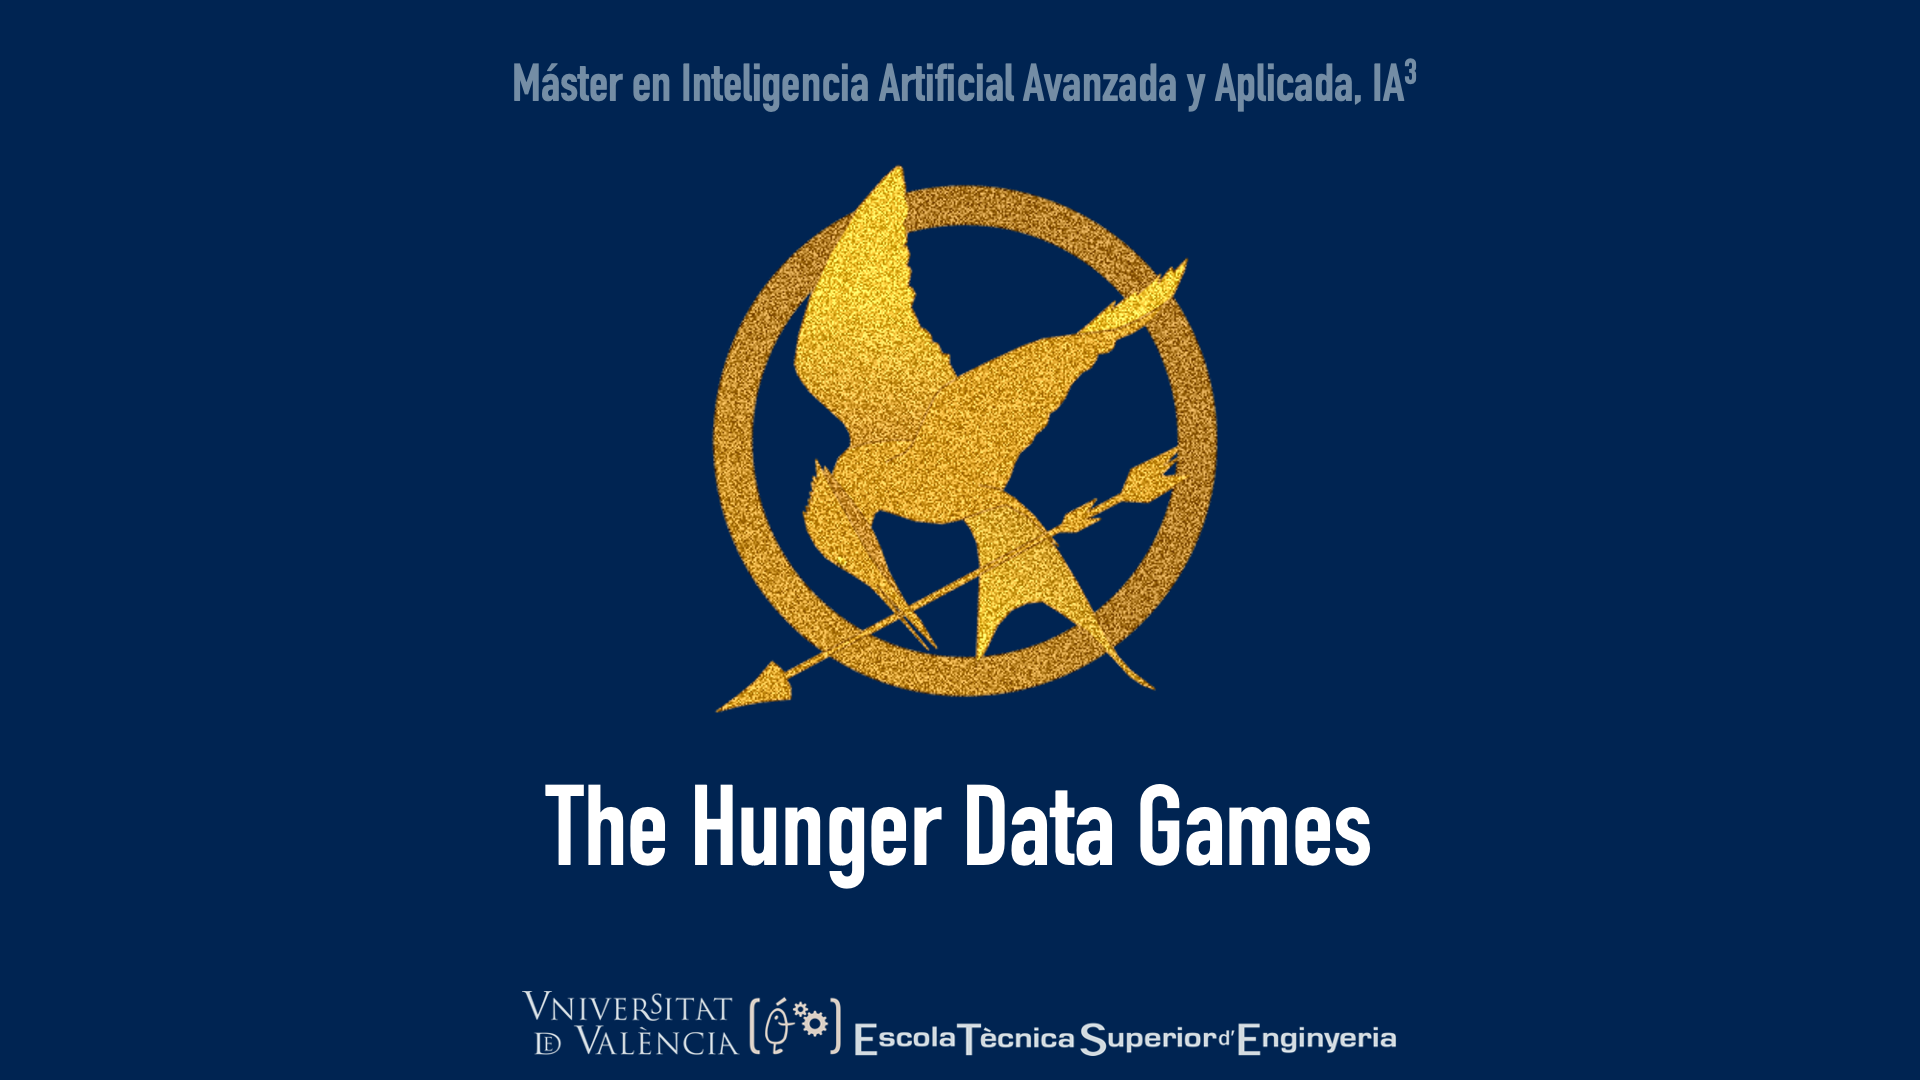

Wellcome to the first hunger data games!!! You have been selected as tributes from your sectors. In this edition you will be facing each other in a classification competition. The dataset you will be facing is this one:



In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
#import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from sklearn import tree
url = "https://raw.githubusercontent.com/CuadraAlconero/IDAL_IA3_CuadraAlconero/main/glass.csv"
df = pd.read_csv(url, header=0)
df.columns = ["refractive_index", "sodium", "magnesium", "aluminum", "silicon", "potassium", "calcium", "barium", "iron", "type_of_glass"]

The target variable is type_of_glass

In [178]:
df.head(10)
df.describe()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron,type_of_glass
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


A few recommendations for you to solve the exercise. Remember the different types of algorithm that we have studied and follow a natural path in building the exercise. Commence using a single estimator and try to build a bagging estimator.

For the evaluation metric check this webpage:

https://scikit-learn.org/stable/modules/model_evaluation.html

Specially check those called balanced_accuracy and f1_micro.

Finally the submission of the exercise must be a model file with the name of your team (find one which is cool I will add the coolness of the name to the final grade). 

Check this webpage for saving the model: https://scikit-learn.org/stable/modules/model_persistence.html

One more thing I will evaluate using the np.random.seed(123) use it for training your model.

In case that a preprocessing of data is performed include a class in the notebook which transforms the original input to your desired one.

In [179]:
df.isna().sum()

refractive_index    0
sodium              0
magnesium           0
aluminum            0
silicon             0
potassium           0
calcium             0
barium              0
iron                0
type_of_glass       0
dtype: int64

In [180]:
#X = df.drop(labels="type_of_glass", axis = 1)
X = df.iloc[:,:-1]
y = df.iloc[:, -1:]

In [181]:
X.head()

,refractive_index,sodium,magnesium,aluminum,silicon,potassium,calcium,barium,iron
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


In [182]:

df.type_of_glass.value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: type_of_glass, dtype: int64

In [12]:
#y=df["type_of_glass"]

In [183]:
y.head()

,type_of_glass
0,1
1,1
2,1
3,1
4,1


In [184]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [185]:
X_train.shape


(160, 9)

In [186]:
X_test.shape

(54, 9)

In [187]:
from sklearn.tree import DecisionTreeClassifier

In [188]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=8)

In [189]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [190]:
model.predict(X_train)

array([2, 1, 2, 1, 7, 6, 1, 1, 3, 7, 2, 1, 3, 6, 1, 1, 1, 7, 2, 5, 1, 3,
       1, 6, 5, 2, 1, 1, 2, 1, 3, 5, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 7,
       2, 7, 5, 6, 2, 1, 6, 5, 1, 6, 7, 2, 3, 7, 1, 2, 1, 1, 3, 3, 2, 1,
       2, 2, 3, 1, 1, 7, 2, 1, 2, 3, 5, 7, 1, 1, 1, 1, 2, 2, 1, 3, 2, 1,
       5, 3, 2, 2, 2, 1, 2, 7, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 5, 1,
       1, 7, 2, 3, 2, 7, 3, 2, 7, 7, 2, 1, 1, 2, 1, 2, 1, 5, 1, 1, 6, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 7, 1, 7, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 6], dtype=int64)

In [191]:
model.score(X_train,y_train)

0.88125

In [192]:
model.score(X_test,y_test)

0.7037037037037037

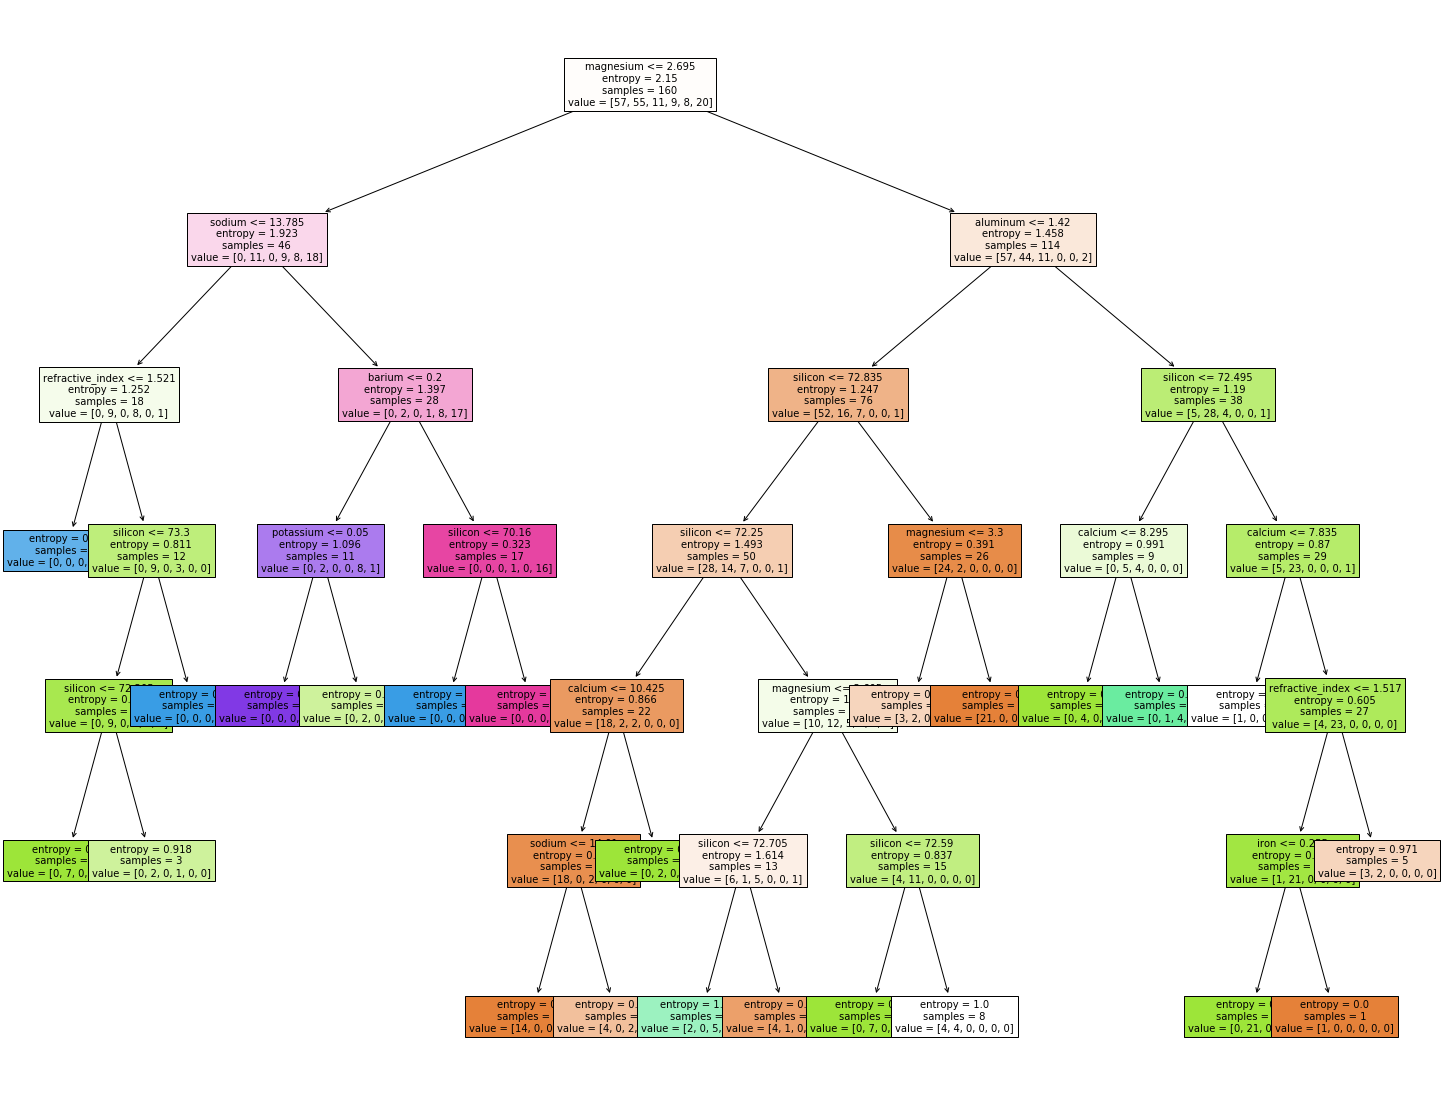

In [193]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=X.columns,
                   filled=True,
                  fontsize=10)

In [194]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

In [195]:
accuracy_score(y_test, model.predict(X_test))

0.7037037037037037

In [196]:
recall_score(y_test, model.predict(X_test), average ="weighted")

0.7037037037037037

In [197]:
precision_score(y_test, model.predict(X_test),average ="weighted")

0.7746913580246912

In [198]:
f1_score(y_test, model.predict(X_test),average ="weighted")

0.6932078814431756

In [199]:
model.classes_

array([1, 2, 3, 5, 6, 7], dtype=int64)

In [201]:
#model.predict_log_proba(X_test)

In [202]:
from sklearn.metrics import precision_score